## Import Relevant Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Understanding

In [22]:
# Import the car fuel efficiency data

data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [38]:
# Inspecting data contents incl. record count, missingness and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


#### Data Descriptive Statistics

In [28]:
# Descriptive statistics for numeric features

data.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [39]:
# Display both the raw counts and normalized (percentage) values for non-numeric columns

strings = list(data.dtypes[data.dtypes == 'object'].index)

for col in strings:
    print(f"\nColumn: {col}")
    counts = data[col].value_counts()
    percents = data[col].value_counts(normalize=True).mul(100).round(2)
    
    value_counts_summary = pd.DataFrame({'Count': counts, 'Percent': percents})
    print(value_counts_summary)


Column: origin
        Count  Percent
origin                
Europe   3254    33.53
Asia     3247    33.46
USA      3203    33.01

Column: fuel_type
           Count  Percent
fuel_type                
Gasoline    4898    50.47
Diesel      4806    49.53

Column: drivetrain
                   Count  Percent
drivetrain                       
All-wheel drive     4876    50.25
Front-wheel drive   4828    49.75


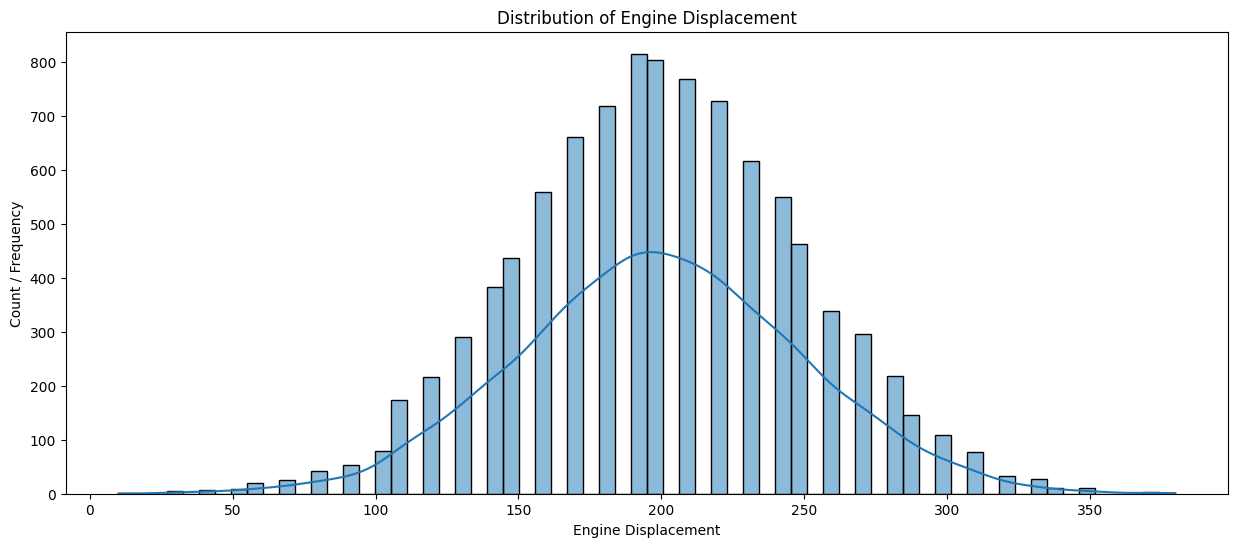

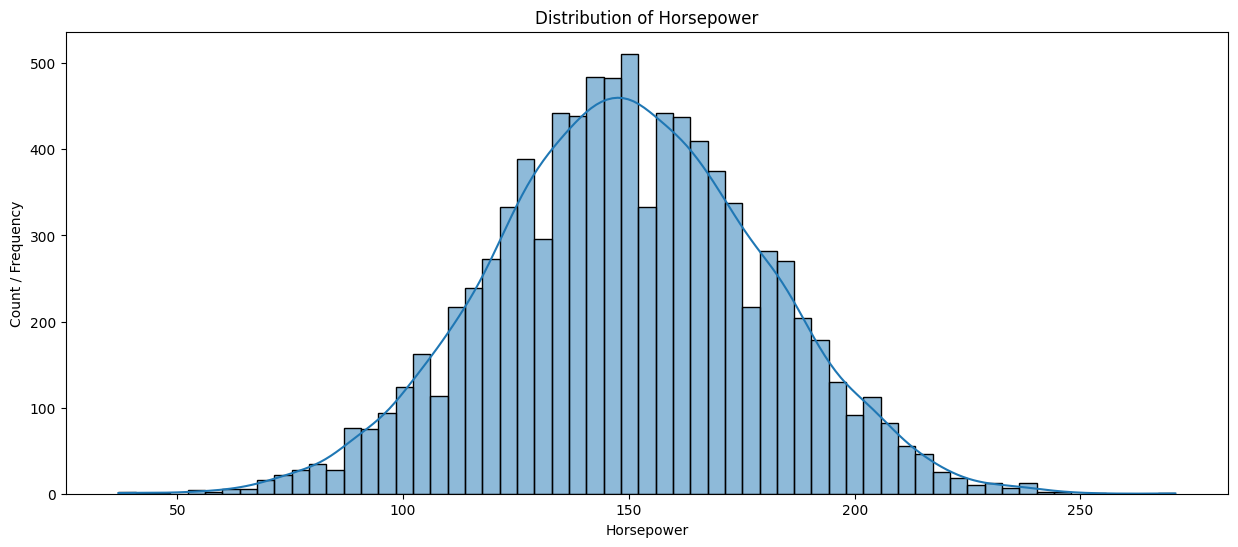

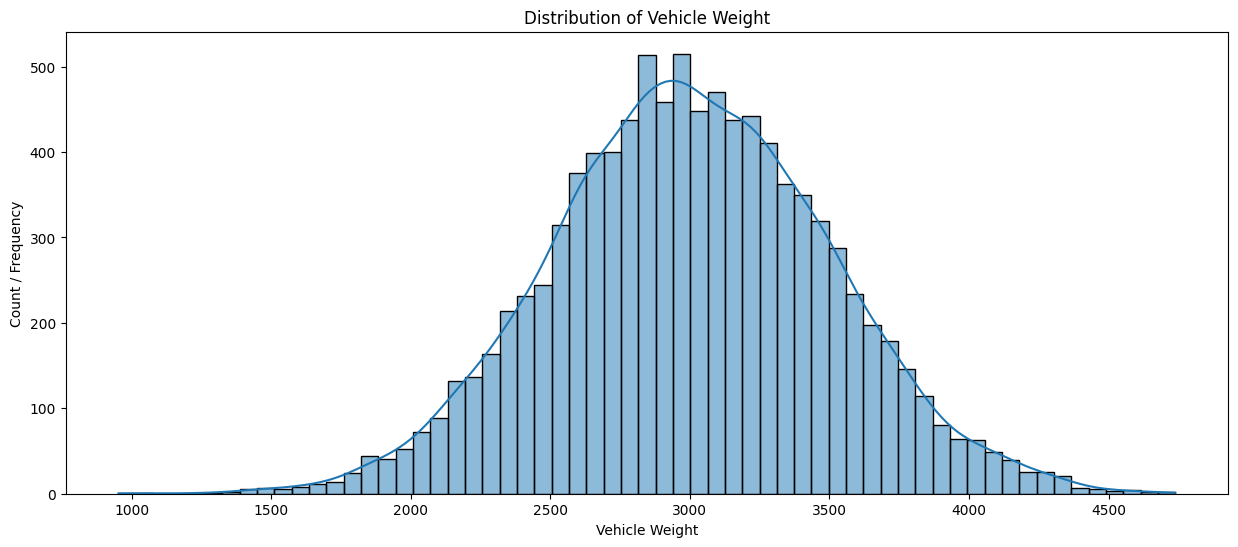

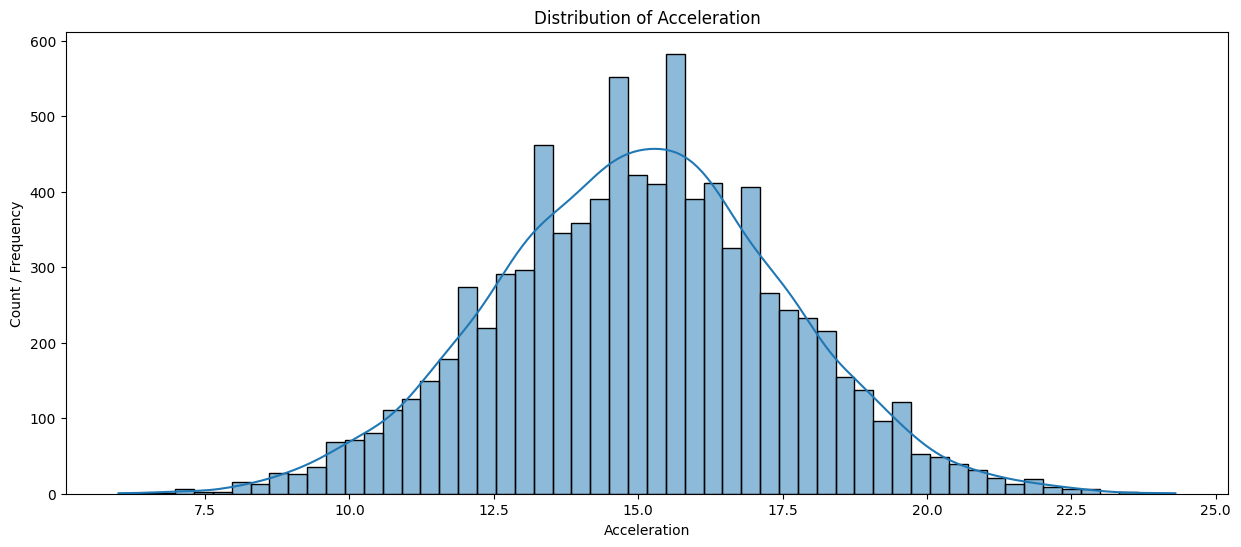

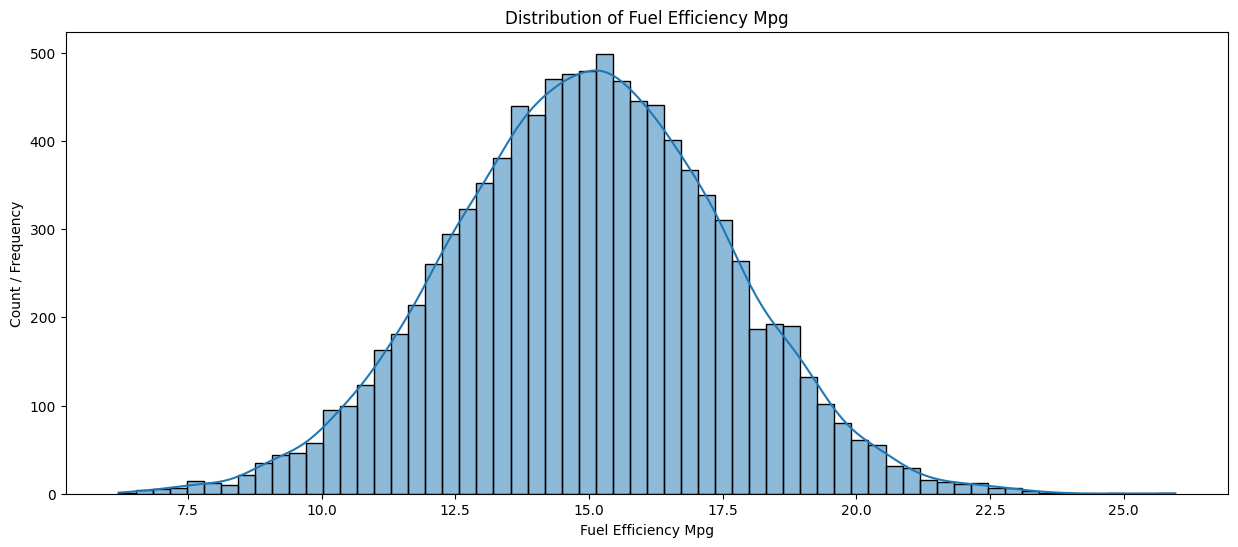

In [44]:
def plot_continuous_numeric_distributions(data):
    """
    Plots the distribution (histogram + KDE) for all continuous numeric columns
    excluding object columns and discrete numeric columns such as 'model_year', 'num_doors', 'num_cylinders'.
    """
    # Identify non-object (numeric) columns
    cont_numeric_cols = [col for col in data.columns if col not in strings + ['model_year','num_doors', 'num_cylinders']]

    # Loop through numeric columns and plot each
    for col in cont_numeric_cols:
        plt.figure(figsize=(15, 6))
        sns.histplot(data=data, x=col, kde=True)
        plt.title(f"Distribution of {col.replace('_', ' ').title()}")
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel("Count / Frequency")
        plt.show()

# Example: call the function
plot_continuous_numeric_distributions(data)

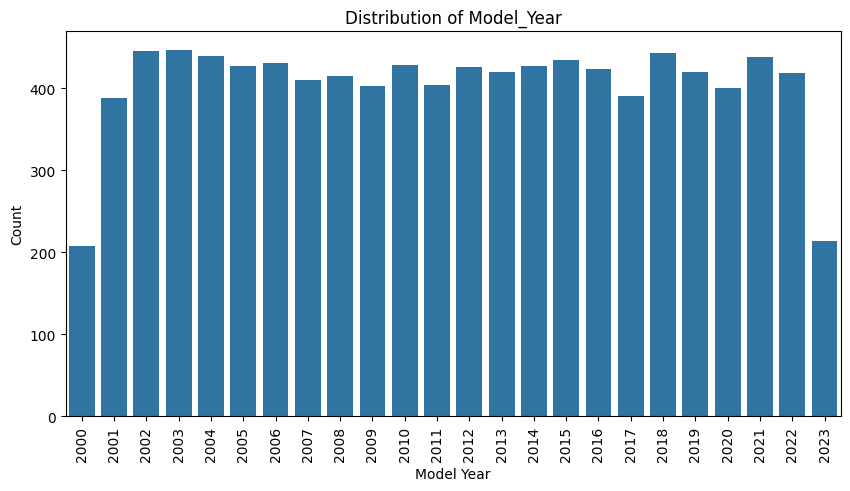

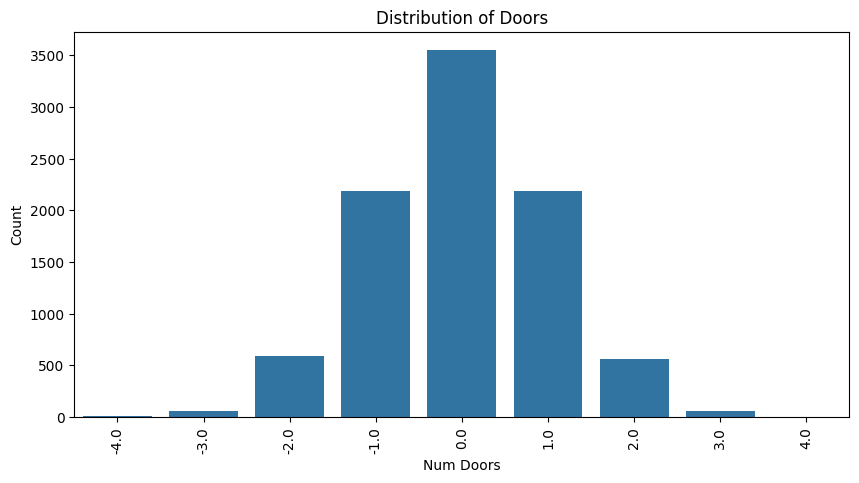

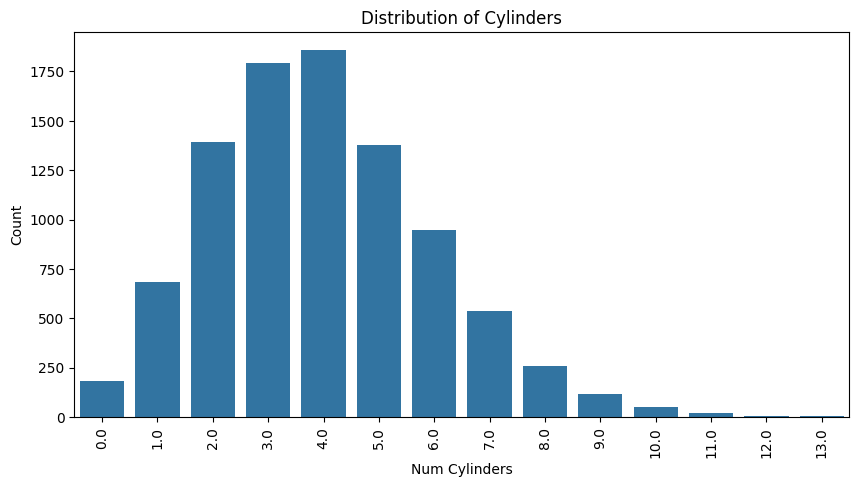

In [53]:
def plot_discrete_distributions(data):
    """
    Plots the distribution (count plot) for discrete numeric columns:
    'model_year', 'num_doors', 'num_cylinders'.
    """
    discrete_cols = ['model_year', 'num_doors', 'num_cylinders']

    for col in discrete_cols:
        if col in data.columns:
            plt.figure(figsize=(10, 5))
            sns.countplot(data=data, x=col)
            plt.title(f"Distribution of {col.replace('num_', '').title()}")
            plt.xlabel(col.replace('_', ' ').title())
            plt.ylabel("Count")
            plt.xticks(rotation=90)
            plt.show()

# Example: call the function
plot_discrete_distributions(data)
